# Clustering by Wine Color

## Wine Data
Data from http://archive.ics.uci.edu/ml/datasets/Wine+Quality

### Citations
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at:
- [@Elsevier](http://dx.doi.org/10.1016/j.dss.2009.05.016)
- [Pre-press (pdf)](http://www3.dsi.uminho.pt/pcortez/winequality09.pdf)
- [bib](http://www3.dsi.uminho.pt/pcortez/dss09.bib)

Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
## Setup

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

red_wine = pd.read_csv('../../ch_09/data/winequality-red.csv')
white_wine = pd.read_csv('../../ch_09/data/winequality-white.csv', sep=';')

## EDA

In [2]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0, 0.5, 'quality score')

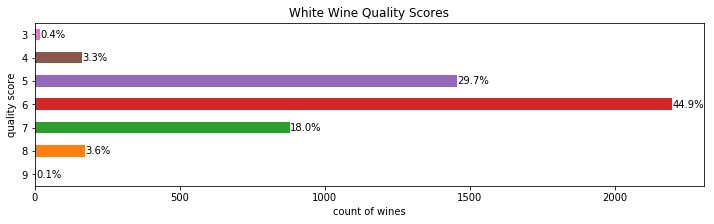

In [4]:
ax = white_wine.quality.value_counts().sort_index(
    ascending=False
).plot.barh(title='White Wine Quality Scores', figsize=(12, 3))
for bar in ax.patches:
    ax.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height()/4, 
        f'{bar.get_width()/white_wine.shape[0]:.1%}'
    )
plt.xlabel('count of wines')
plt.ylabel('quality score')

Text(0, 0.5, 'quality score')

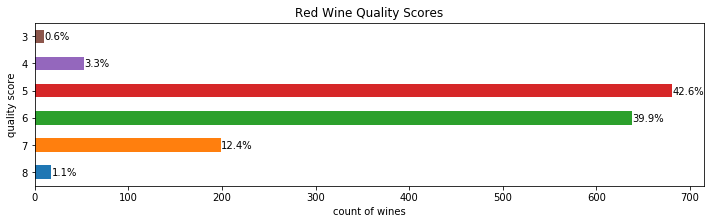

In [5]:
ax = red_wine.quality.value_counts().sort_index(
    ascending=False
).plot.barh(title='Red Wine Quality Scores', figsize=(12, 3))
for bar in ax.patches:
    ax.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height()/4, 
        f'{bar.get_width()/red_wine.shape[0]:.1%}'
    )
plt.xlabel('count of wines')
plt.ylabel('quality score')

In [6]:
wine = pd.concat([white_wine.assign(kind='white'), red_wine.assign(kind='red')])
wine.sample(5, random_state=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kind
848,6.4,0.64,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8,5,red
2529,6.6,0.42,0.13,12.8,0.044,26.0,158.0,0.99772,3.24,0.47,9.0,5,white
131,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5,red
244,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,red
1551,6.6,0.19,0.99,1.2,0.122,45.0,129.0,0.99360,3.09,0.31,8.7,6,white


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
kind                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 685.2+ KB


In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
wine.describe(include='object')

,kind
count,6497
unique,2
top,white
freq,4898


In [10]:
wine.kind.value_counts()

white    4898
red      1599
Name: kind, dtype: int64

## Clustering to Separate Red and White Wines

In [11]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

y = wine.kind
X = wine.drop(columns=['quality', 'kind'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0, stratify=y
)

kmeans_pipeline = Pipeline([
    ('scale', StandardScaler()), ('kmeans', KMeans(n_clusters=2, random_state=0))
]).fit(X_train)

### Measure the agreement between predicted wine type and actual

In [12]:
pd.Series(kmeans_pipeline.predict(X_test)).value_counts()

1    1211
0     414
dtype: int64

In [13]:
y_test.value_counts()

white    1225
red       400
Name: kind, dtype: int64

#### Fowlkes Mallows Index
Values range from [0, 1] where 1 is perfect agreement:
$$ FMI = \frac{TP}{\sqrt{(TP + FP)\times(TP + FN)}} $$
where
- TP = points that are in the same cluster in the true labels are predicted to be in the same cluster
- FP = points that are in the same cluster in the true labels but are not predicted to be in the same cluster
- FP = points that are not in the same cluster in the true labels but are predicted to be in the same cluster

In [14]:
from sklearn.metrics import fowlkes_mallows_score
# we need to make y_test binary, but which label red becomes doesn't matter for the result
fowlkes_mallows_score(np.where(y_test == 'red', 0, 1), kmeans_pipeline.predict(X_test))

0.9824673716471775

### Finding the Centroids

In [15]:
pd.DataFrame(
    kmeans_pipeline.named_steps['kmeans'].cluster_centers_,
    columns=X_train.columns
).T

,0,1
fixed acidity,0.812282,-0.275524
volatile acidity,1.178543,-0.399759
citric acid,-0.368395,0.124959
residual sugar,-0.629024,0.213363
chlorides,0.941155,-0.319237
free sulfur dioxide,-0.843413,0.286084
total sulfur dioxide,-1.191822,0.404263
density,0.663534,-0.225069
pH,0.573143,-0.194409
sulphates,0.848734,-0.287888
